In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("E:\Girish Documents\Study\Data Science\DataScience_ML_Study\ML_Study_K-Means-Clustering\income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


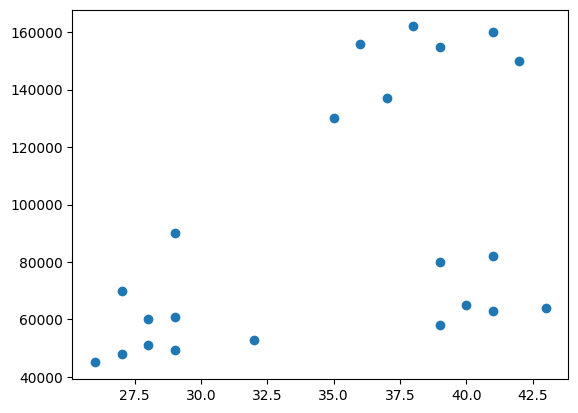

In [5]:
plt.scatter(df['Age'], df['Income($)'])

In [25]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [26]:
km.fit(df[['Age', 'Income($)']])

KMeans(n_clusters=3)

In [27]:
y_predicted = km.predict(df[['Age', 'Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


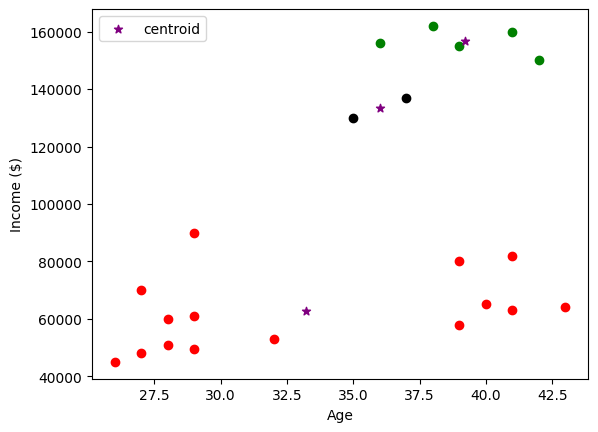

In [29]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

**If you observe here, our clusters are not properly formed, that is because our Y Axis is in thousands & X Axis is less than 100. So we need to preprocess it with the use of MinMaxScalar**

In [30]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [35]:
scalar.fit(df[['Income($)']].values.reshape(-1, 1))
df['Income($)'] = scalar.transform(df['Income($)'].values.reshape(-1, 1))

In [37]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,1
1,Michael,29,0.384615,1
2,Mohan,29,0.136752,1
3,Ismail,28,0.128205,1
4,Kory,42,0.897436,0


**DO THE SAME TRANSFORMATION FOR AGE AS WELL**

In [38]:
scalar.fit(df[['Age']].values.reshape(-1, 1))
df['Age'] = scalar.transform(df['Age'].values.reshape(-1, 1))

In [39]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [47]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


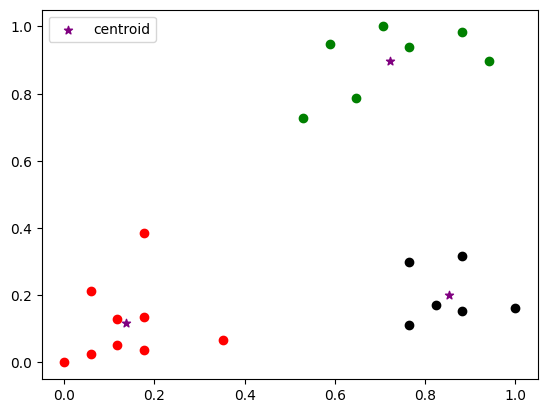

In [48]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

**ELBOW PLOT METHOD**

In [51]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [52]:
sse

[5.434011511988177,
 2.345614491472593,
 0.4750783498553095,
 0.3491047094419564,
 0.2621792762345213,
 0.23472396003560048,
 0.20411419102196315,
 0.1520589707695998,
 0.11790008971751198]

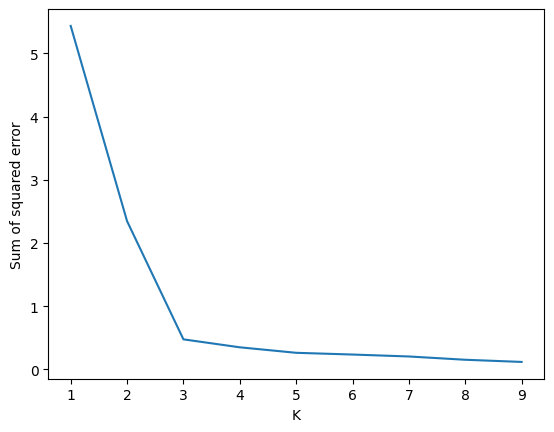

In [53]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
